In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
import tensorflow as tf
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
from glob import glob
from sklearn.model_selection import train_test_split

In [3]:
review_data = pd.read_csv('./data/oph_total.csv', encoding = 'utf-8')
review_data2 = pd.read_csv('./data/bct_review.csv', encoding = 'utf-8')
review_data3 = pd.read_csv('./data/total1.csv', encoding = 'utf-8')
review_data4 = pd.read_csv('./data/total2.csv')
df = pd.concat([review_data, review_data2, review_data3, review_data4])
df = df.reset_index()
df
# df.to_csv('../json_csv_files/review_data/final_review_dataframe.csv', index=False, encoding="utf-8-sig")

,index,리뷰어 이름,리뷰어 멤버 id,별점,리뷰 내용,리뷰로부터 도움 받은 사람 수,리뷰 작성일자,Unnamed: 0
0,0,노*희,108878203,3,질염 방광염에 고등학생 딸이 팬티라이너 없인 생활이 곤란했죠. 냉도 많고 냄새도 불...,NaN,2023.12.20,NaN
1,1,한*영,79205694,3,늘 챙겨먹는 유산균이 됐어요ㅎㅎ 으른임에도 캡슐약은 잘 못 삼켜서 물만 한대박 마시...,21.0,2023.06.08,NaN
2,2,김*정,128926123,3,여름만 되면 습해서 가려움 때문에 진짜 고생 많이해요..;; 너무 불편하고 그럴때...,18.0,2021.08.17,NaN
3,3,김*희,154477927,3,이제 7일차입니다 아직 뱃살빠지는 느낌은 없고요 좀더 먹어야 하나봐요 나이가 50...,30.0,2023.08.11,NaN
4,4,최*영,132121964,3,유산균이랑질유산균 둘다 먹고 잇고 변비약도 먹고 잇는데 이 유산균 이 세가지를 다...,6.0,2023.10.11,NaN
...,...,...,...,...,...,...,...,...
133712,50153,김*경,122725714,1,새 제품을 샀는데 이렇게 오는게 맞나요? 아무리 물류센터에서 던지면서 운반 된다고...,8,2022.12.04,50153.0
133713,50154,최*용,119253707,1,전력약함,NaN,2023.09.19,50154.0
133714,50155,샘도아,125262418,1,콘센트가 한번에 팍 고정되는 느낌이 아니라 이리저리 흔들려서 충전이 됐다 안됐다 하네요ㅠ,1,2023.06.03,50155.0
133715,50156,장*민,111333135,1,삼일째 쓰고 있는데 한구는 고장이네요 제일 끝에 있는 데는 불도 안나오고 전기도 안...,NaN,2023.12.16,50156.0


In [4]:
# 별점-1
df['별점'] = df['별점']-1
df.head(3)

,index,리뷰어 이름,리뷰어 멤버 id,별점,리뷰 내용,리뷰로부터 도움 받은 사람 수,리뷰 작성일자,Unnamed: 0
0,0,노*희,108878203,2,질염 방광염에 고등학생 딸이 팬티라이너 없인 생활이 곤란했죠. 냉도 많고 냄새도 불...,NaN,2023.12.20,NaN
1,1,한*영,79205694,2,늘 챙겨먹는 유산균이 됐어요ㅎㅎ 으른임에도 캡슐약은 잘 못 삼켜서 물만 한대박 마시...,21.0,2023.06.08,NaN
2,2,김*정,128926123,2,여름만 되면 습해서 가려움 때문에 진짜 고생 많이해요..;; 너무 불편하고 그럴때...,18.0,2021.08.17,NaN


In [5]:
len(df)

133717

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133717 entries, 0 to 133716
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   index   133717 non-null  int64 
 1   별점      133717 non-null  int64 
 2   리뷰 내용   133717 non-null  object
dtypes: int64(2), object(1)
memory usage: 3.1+ MB


In [5]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
df = df.drop('리뷰어 이름', axis=1)
df = df.drop('리뷰로부터 도움 받은 사람 수', axis=1)
df = df.drop('리뷰 작성일자', axis=1)
df = df.drop('리뷰어 멤버 id', axis=1)

In [7]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
print('훈련샘플의개수:', len(train_data))
print('테스트 샘플의 개수:', len(test_data))

훈련샘플의개수: 106973
테스트 샘플의 개수: 26744


In [9]:
train_data.head()

,index,별점,리뷰 내용
87874,4315,1,시네빔HU70LA 제품이라 베사홀을 선택했는데 이게 설치할때 약간 헷갈립니다. 후...
70381,23302,1,생각했던것보다 맛은 있었음 둘이 먹는데 양이적었어요ㅠ 손질된거라 편하게 먹었어요 ...
30220,6469,0,문제점을 문의해도 답변이 없네요.. 세개째 폼랜스인데 제가 운이 없던건지 원래 이...
37609,13858,0,까진곳이있어요 힘들게조립한거라 반품시키기 그래서 애가 좋아하니 그냥 씁니당 아이가...
37407,13656,1,신발이 반짝거려서 좋았는데 끄고 켤수가 없어서 건전지 다 되니 4일만에 불빛은 없...


1. 중복확인

In [10]:
train_data['리뷰 내용'].nunique(), train_data['별점'].nunique()
# 5946 중 4609만 unique하다

(95019, 3)

In [11]:
train_data.drop_duplicates(subset=['리뷰 내용'], inplace=True)
print('총 샘플의 수 : ', len(train_data))

총 샘플의 수 :  95019


<Axes: xlabel='별점'>

C:\Users\Gun Won Park\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
C:\Users\Gun Won Park\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  func(*args, **kwargs)
C:\Users\Gun Won Park\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Gun Won Park\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


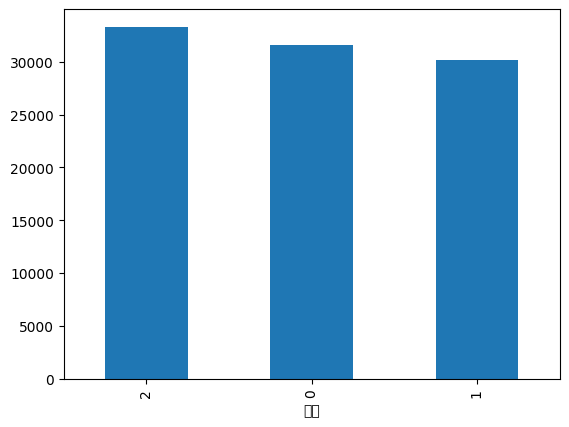

In [12]:
train_data['별점'].value_counts().plot(kind='bar')

In [17]:
train_data.groupby('별점').size().reset_index(name='count')

,별점,count
0,0,31583
1,1,30139
2,2,33297


2. 결측치 확인

In [13]:
# 결측치 확인
print(train_data.isnull().values.any())

False


In [14]:
train_data.isnull().sum()

index    0
별점       0
리뷰 내용    0
dtype: int64

In [20]:
print(len(train_data))

95019


3. 문자 전처리

In [15]:
import re
def temp(review):
    return re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)

In [16]:
train_data['리뷰 내용'][:5].apply(temp)

87874     시네빔 제품이라 베사홀을 선택했는데 이게 설치할때 약간 헷갈립니다 후기를 보면 분...
70381     생각했던것보다 맛은 있었음 둘이 먹는데 양이적었어요ㅠ 손질된거라 편하게 먹었어요 ...
30220     문제점을 문의해도 답변이 없네요 세개째 폼랜스인데 제가 운이 없던건지 원래 이런건...
37609     까진곳이있어요 힘들게조립한거라 반품시키기 그래서 애가 좋아하니 그냥 씁니당 아이가...
37407     신발이 반짝거려서 좋았는데 끄고 켤수가 없어서 건전지 다 되니 일만에 불빛은 없구...
Name: 리뷰 내용, dtype: object

In [17]:
train_data['리뷰 내용'] = train_data['리뷰 내용'].apply(temp)

train_data[:5]

,index,별점,리뷰 내용
87874,4315,1,시네빔 제품이라 베사홀을 선택했는데 이게 설치할때 약간 헷갈립니다 후기를 보면 분...
70381,23302,1,생각했던것보다 맛은 있었음 둘이 먹는데 양이적었어요ㅠ 손질된거라 편하게 먹었어요 ...
30220,6469,0,문제점을 문의해도 답변이 없네요 세개째 폼랜스인데 제가 운이 없던건지 원래 이런건...
37609,13858,0,까진곳이있어요 힘들게조립한거라 반품시키기 그래서 애가 좋아하니 그냥 씁니당 아이가...
37407,13656,1,신발이 반짝거려서 좋았는데 끄고 켤수가 없어서 건전지 다 되니 일만에 불빛은 없구...


In [24]:
train_data['리뷰 내용'][:10]

87874      시네빔 제품이라 베사홀을 선택했는데 이게 설치할때 약간 헷갈립니다 후기를 보면 분...
70381      생각했던것보다 맛은 있었음 둘이 먹는데 양이적었어요ㅠ 손질된거라 편하게 먹었어요 ...
30220      문제점을 문의해도 답변이 없네요 세개째 폼랜스인데 제가 운이 없던건지 원래 이런건...
37609      까진곳이있어요 힘들게조립한거라 반품시키기 그래서 애가 좋아하니 그냥 씁니당 아이가...
37407      신발이 반짝거려서 좋았는데 끄고 켤수가 없어서 건전지 다 되니 일만에 불빛은 없구...
115288    사이즈 잘 보세요 토마호크 구우려고  샀어요 그런데 이 제품 라인이 특징이 깊이가 ...
72504      이게뭔가요아무리 우유지만 이렇게 배송오면 기분이 좋을까요 다찌그러져서 오고 배송진...
7478      엉망진창 포장배송 주의 맛은 괜춘 가족들 아침대용 건강한 간식으로 구입했어요  그런...
98776     생각보다 커서 좋아요 정리 안된 화초들 예쁘게 정리 생각보다 튼튼하고 예뻐요 조립하...
84036     결점으로 인해 총번교환에도 번째 모니터까지도결점발생 진짜 최악이네요 혹시몰라 무결점...
Name: 리뷰 내용, dtype: object

In [18]:
train_data.isnull().sum()

index    0
별점       0
리뷰 내용    0
dtype: int64

In [19]:
# 테스트데이터 전처리
test_data.drop_duplicates(subset = ['리뷰 내용'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data = test_data.dropna(how='any') # Null 값 제거
test_data['리뷰 내용'] = test_data['리뷰 내용'].apply(temp)
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 25885


In [341]:
#stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [20]:
stopwords = ['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가',
              '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면',
              '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다',
              '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에',
              '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다',
              '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳',
              '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때',
              '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다',
              '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼',
              '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만',
              '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로', '반대로 말하자면', '이와 반대로', '바꾸어서 말하면', '바꾸어서 한다면', '만약',
              '그렇지않으면', '까악', '툭', '딱', '삐걱거리다', '보드득', '비걱거리다', '꽈당', '응당', '해야한다', '에 가서', '각', '각각', '여러분',
              '각종', '각자', '제각기', '하도록하다', '와', '과', '그러므로', '그래서', '고로', '한 까닭에', '하기 때문에', '거니와', '이지만', '대하여',
              '관하여', '관한', '과연', '실로', '아니나다를가', '생각한대로', '진짜로', '한적이있다', '하곤하였다', '하', '하하', '허허', '아하', '거바',
              '와', '오', '왜', '어째서', '무엇때문에', '어찌', '하겠는가', '무슨', '어디', '어느곳', '더군다나', '하물며', '더욱이는', '어느때', '언제',
              '야', '이봐', '어이', '여보시오', '흐흐', '흥', '휴', '헉헉', '헐떡헐떡', '영차', '여차', '어기여차', '끙끙', '아야', '앗', '아야', '콸콸',
              '졸졸', '좍좍', '뚝뚝', '주룩주룩', '솨', '우르르', '그래도', '또', '그리고', '바꾸어말하면', '바꾸어말하자면', '혹은', '혹시', '답다', '및',
              '그에 따르는', '때가 되어', '즉', '지든지', '설령', '가령', '하더라도', '할지라도', '일지라도', '지든지', '몇', '거의', '하마터면', '인젠',
              '이젠', '된바에야', '된이상', '만큼', '어찌됏든', '그위에', '게다가', '점에서 보아', '비추어 보아', '고려하면', '하게될것이다', '일것이다',
              '비교적', '좀', '보다더', '비하면', '시키다', '하게하다', '할만하다', '의해서', '연이서', '이어서', '잇따라', '뒤따라', '뒤이어', '결국',
              '의지하여', '기대여', '통하여', '자마자', '더욱더', '불구하고', '얼마든지', '마음대로', '주저하지 않고', '곧', '즉시', '바로', '당장',
              '하자마자', '밖에 안된다', '하면된다', '그래', '그렇지', '요컨대', '다시 말하자면', '바꿔 말하면', '즉', '구체적으로', '말하자면', '시작하여',
              '시초에', '이상', '허', '헉', '허걱', '바와같이', '해도좋다', '해도된다', '게다가', '더구나', '하물며', '와르르', '팍', '퍽', '펄렁', '동안',
              '이래', '하고있었다', '이었다', '에서', '로부터', '까지', '예하면', '했어요', '해요', '함께', '같이', '더불어','마저', '마저도', '양자',
              '모두', '습니다', '가까스로', '하려고하다', '즈음하여', '다른', '다른 방면으로', '해봐요', '습니까', '했어요', '말할것도 없고', '무릎쓰고',
              '개의치않고', '하는것만 못하다', '하는것이 낫다', '매', '매번', '들', '모', '어느것', '어느', '로써', '갖고말하자면', '어디', '어느쪽',
              '어느것', '어느해', '어느 년도', '라 해도', '언젠가', '어떤것', '어느것', '저기', '저쪽', '저것', '그때', '그럼', '그러면', '요만한걸',
              '그래', '그때', '저것만큼', '그저', '이르기까지', '할 줄 안다', '할 힘이 있다', '너', '너희', '당신', '어찌', '설마', '차라리', '할지언정',
              '할지라도', '할망정', '할지언정', '구토하다', '게우다', '토하다', '메쓰겁다', '옆사람', '퉤', '쳇', '의거하여', '근거하여', '의해', '따라',
              '힘입어', '그', '다음', '버금', '두번째로', '기타', '첫번째로', '나머지는', '그중에서', '견지에서', '형식으로 쓰여', '입장에서', '위해서',
              '단지', '의해되다', '하도록시키다', '뿐만아니라', '반대로', '전후', '전자', '앞의것', '잠시', '잠깐', '하면서', '그렇지만', '다음에',
              '그러한즉', '그런즉', '남들', '아무거나', '어찌하든지', '같다', '비슷하다', '예컨대', '이럴정도로', '어떻게', '만약', '만일',
              '위에서 서술한바와같이', '인 듯하다', '하지 않는다면', '만약에', '무엇', '무슨', '어느', '어떤', '아래윗', '조차', '한데', '그럼에도 불구하고',
              '여전히', '심지어', '까지도', '조차도', '하지 않도록', '않기 위하여', '때', '시각', '무렵', '시간', '동안', '어때', '어떠한', '하여금',
              '네', '예', '우선', '누구', '누가 알겠는가', '아무도', '줄은모른다', '줄은 몰랏다', '하는 김에', '겸사겸사', '하는바', '그런 까닭에',
              '한 이유는', '그러니', '그러니까', '때문에', '그', '너희', '그들', '너희들', '타인', '것', '것들', '너', '위하여', '공동으로', '동시에',
              '하기 위하여', '어찌하여', '무엇때문에', '붕붕', '윙윙', '나', '우리', '엉엉', '휘익', '윙윙', '오호', '아하', '어쨋든', '만 못하다',
              '하기보다는', '차라리', '하는 편이 낫다', '흐흐', '놀라다', '상대적으로 말하자면', '마치', '아니라면', '쉿', '그렇지 않으면', '그렇지 않다면',
              '안 그러면', '아니었다면', '하든지', '아니면', '이라면', '좋아', '알았어', '하는것도', '그만이다', '어쩔수 없다', '하나', '일', '일반적으로',
              '일단', '한켠으로는', '오자마자', '이렇게되면', '이와같다면', '전부', '한마디', '한항목', '근거로', '하기에', '아울러', '하지 않도록',
              '않기 위해서', '이르기까지', '이 되다', '로 인하여', '까닭으로', '이유만으로', '이로 인하여', '그래서', '이 때문에', '그러므로', '그런 까닭에',
              '알 수 있다', '결론을 낼 수 있다', '으로 인하여', '있다', '어떤것', '관계가 있다', '관련이 있다', '연관되다', '어떤것들', '에 대해', '이리하여',
              '그리하여', '여부', '하기보다는', '하느니', '하면 할수록', '운운', '이러이러하다', '하구나', '하도다', '다시말하면', '다음으로', '에 있다',
              '에 달려 있다', '우리', '우리들', '오히려', '하기는한데', '어떻게', '어떻해', '어찌됏어', '어때', '어째서', '본대로', '자', '이', '이쪽',
              '여기', '이것', '이번', '이렇게말하자면', '이런', '이러한', '이와 같은', '요만큼', '요만한 것', '얼마 안 되는 것', '이만큼', '이 정도의',
              '이렇게 많은 것', '이와 같다', '이때', '이렇구나', '것과 같이', '끼익', '삐걱', '따위', '와 같은 사람들', '부류의 사람들', '왜냐하면',
              '중의하나', '오직', '오로지', '에 한하다', '하기만 하면', '도착하다', '까지 미치다', '도달하다', '정도에 이르다', '할 지경이다', '결과에 이르다',
              '관해서는', '여러분', '하고 있다', '한 후', '혼자', '자기', '자기집', '자신', '우에 종합한것과같이', '총적으로 보면', '총적으로 말하면',
              '총적으로', '대로 하다', '으로서', '참', '그만이다', '할 따름이다', '쿵', '탕탕', '쾅쾅', '둥둥', '봐', '봐라', '아이야', '아니', '와아',
              '응', '아이', '참나', '년', '월', '일', '령', '영', '일', '이', '삼', '사', '오', '육', '륙', '칠', '팔', '구', '이천육', '이천칠', '이천팔',
              '이천구', '하나', '둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영', 'ㅋㅋ', 'ㅜㅜ']

In [21]:
#stopwords = stopwords+st
len(stopwords)

679

4. 토픈화 및 stopwords 제거

In [22]:
okt = Okt()

In [23]:
X_train = []
for sentence in tqdm(train_data['리뷰 내용']):
    tok_sen = okt.morphs(sentence, stem=True) # 형태소 추출
    stop_rm_tok = []
    for word in tok_sen:
        if (not word in stopwords) and (len(word) != 1):
            stop_rm_tok.append(word)
    X_train.append(stop_rm_tok)

100%|████████████████████████████████████| 95019/95019 [21:24<00:00, 74.00it/s]


In [26]:
X_train[:5]

[['제품',
  '이라',
  '베사',
  '선택',
  '하다',
  '설치',
  '하다',
  '헷갈리다',
  '후기',
  '보다',
  '분명',
  '가능하다',
  '나오다',
  '막상',
  '해보다',
  '처음',
  '에는',
  '안되다',
  '어떻다',
  '하다',
  '라고',
  '느껴지다',
  '하다',
  '보다',
  '나오다',
  '흔들리다',
  '핸들링',
  '아주',
  '좋다',
  '않다',
  '베사',
  '타입',
  '제품',
  '가장',
  '가성',
  '좋다'],
 ['생각',
  '하다',
  '먹다',
  '적다',
  '손질',
  '된거',
  '편하다',
  '먹다',
  '가격',
  '비다',
  '비싸다',
  '편임',
  '끓다',
  '물속',
  '피다',
  'ㅎㅎ'],
 ['문제점',
  '문의',
  '하다',
  '답변',
  '없다',
  '랜스',
  '인데',
  '없다',
  '건지다',
  '원래',
  '고르다',
  '분사',
  '때문',
  '개인',
  '비추다',
  '하다'],
 ['끄다', '힘들다', '조립', '반품', '애가', '좋아하다', '그냥', '쓰다', '좋아하다'],
 ['신발',
  '반짝거리다',
  '좋다',
  '끄다',
  '켜다',
  '없다',
  '건전지',
  '되다',
  '일만',
  '불빛',
  '없다',
  '귀걸이',
  '소중하다',
  '다루다',
  '하다',
  '다니다',
  '왕관',
  '보석',
  '떨어지다',
  '칠이',
  '벗겨지다',
  '목걸이',
  '담날',
  '끊어지다',
  '다시',
  '주다',
  '가방',
  '작다',
  '버리다',
  '받다',
  '모든',
  '성품',
  '허다',
  '딸아이',
  '엄청',
  '좋아하다',
  '많이',
  '주네']]

In [31]:
test_data['리뷰 내용']

120697     새로이사온집이 우풍이 너무심해서 진짜 엄청검색하다가삼 우풍방지 텐트 종류 엄청다양...
3557      아이가 잘먹어요 꾸준히 아이먹이고 있는제품근데 왜이리 가격이 올랐는지ㅜㅜ가격대비 만...
92922      제니퍼룸 미니 오븐 토스터  신혼집에 토스터기가 필요했는데요 쑝하고 튀어나오는 토...
119559     대체 돌가루물은 언제쯤 안나오는거임 이쯤 되면 내가 절구를 갈고있다는 생각이 듦 ...
94828                   따뜻합니다 안미끌리네요 얼룩이지는건 어쩔수없죠 사이즈는 딱맞아요
                                ...                        
11216     헬륨가스가 풍선 개 넣었더니 없어요 ㅠ 사용하던거 주신듯만원에이건 아닌듯요ㅠ 아들 ...
16276      동결건조 식품이 비싼건 이해하지만  가격대비 양이 아쉽네요  포장은 깔끔하고 아이...
15777     우리애기들 최애간식 살된우리아들도 너무잘먹고 살에 얼마전떠난 우리딸도 정말좋아하는간...
50329      생각보다 작은 크기이지만 비교 가능하게 물티슈랑 같이 놓아두고 사진을 찍었어요 아...
41681      가격대비 구성 괜찮아요 아이가 어린이집에서 블럭으로 맞추는걸 좋아한대서 검색해보고...
Name: 리뷰 내용, Length: 25885, dtype: object

In [25]:
X_test = []
for sentence in tqdm(test_data['리뷰 내용']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = []
    for word in tokenized_sentence:
        if (not word in stopwords) and (len(word) != 1):
            stopwords_removed_sentence.append(word)
    X_test.append(stopwords_removed_sentence)

100%|████████████████████████████████████| 25885/25885 [08:01<00:00, 53.79it/s]


In [33]:
X_test[:5]

[['새로이',
  '사오다',
  '우풍',
  '무심하다',
  '진짜',
  '엄청',
  '검색',
  '다가',
  '방지',
  '텐트',
  '종류',
  '엄청',
  '다양하다',
  '가격',
  '저렴하다',
  '진짜',
  '비싸다',
  '텐트',
  '질도',
  '고민',
  '하다',
  '따다',
  '수미',
  '텐트',
  '삿어',
  '원주고',
  '살다',
  '오반',
  '하다',
  '정도',
  '장바구니',
  '담다',
  '근데',
  '하루',
  '사이',
  '할인',
  '하다',
  '고민',
  '다가',
  '한번',
  '말다',
  '생각',
  '하고',
  '결재',
  '하루',
  '고민',
  '할껄',
  '싸다',
  '사다',
  '세탁',
  '가능하다',
  '브릭',
  '소재',
  '배송',
  '첫날',
  '생각',
  '보다',
  '냄새',
  '낫다',
  '닦다',
  '는걸',
  '닦다',
  '그닥',
  '많이',
  '묻다',
  '나오다',
  '없다',
  '크기',
  '사이',
  '늘다',
  '센스',
  '깔다',
  '에두',
  '은감',
  '들어가다',
  '눕다',
  '잇다',
  '어른',
  '넉넉하다',
  '구르다',
  '자도',
  '되다',
  '정도',
  '아늑하다',
  '색감',
  '베이지',
  '포근하다',
  '느낌',
  '근데',
  '진짜',
  '신기하다',
  '너무',
  '따뜻하다',
  '그렇다고',
  '답답하다',
  '않다',
  '둥치다',
  '뚫리다',
  '런가',
  '꿀잠',
  '잣음'],
 ['먹다',
  '꾸준하다',
  '먹이',
  '제품',
  '근데',
  '이리',
  '가격',
  '가격',
  '대비',
  '만족스럽다',
  '꾸준하다',
  '먹이다',
  '오다',
  '판매',
  '하다',
  '곳도',
  '주다',
  '대부분',
  '

In [27]:
print('전처리 후 테스트용 샘플의 개수 :',len(X_test))
print('전처리 후 학습용 샘플의 개수 :',len(X_train))

전처리 후 테스트용 샘플의 개수 : 25885
전처리 후 학습용 샘플의 개수 : 95019


#### 토큰화 시간이 오래걸리므로 임시변수 저장

In [28]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [29]:
len(tokenizer.word_index)

54114

5. 토큰화된 학습 데이터 활용 단어사전 생성
- keras Tokenizer() 활용

#### 단어의 등장빈도수를 활용해 등장빈도수가 낮은 단어들은 제거

In [30]:
# 단어의 등장 횟수가 3개보다 작은 단어들을 제거
filtered_word_counts = {word: count for word, count in tokenizer.word_counts.items() if count >= 3}

# Tokenizer 업데이트: 등장 횟수가 3개보다 작은 단어들이 제거된 상태로 업데이트
tokenizer.word_index = {word: idx for idx, (word, _) in enumerate(sorted(filtered_word_counts.items(), key=lambda x: x[1], reverse=True), start=1)}
tokenizer.word_counts = filtered_word_counts

In [31]:
tokenizer.word_counts.items()

dict_items([('제품', 40806), ('이라', 15062), ('베사', 27), ('선택', 4754), ('하다', 286456), ('설치', 4106), ('헷갈리다', 214), ('후기', 17623), ('보다', 65126), ('분명', 320), ('가능하다', 5853), ('나오다', 11579), ('막상', 557), ('해보다', 11581), ('처음', 10445), ('에는', 10607), ('안되다', 8068), ('어떻다', 3312), ('라고', 3447), ('느껴지다', 3218), ('흔들리다', 749), ('핸들링', 101), ('아주', 9395), ('좋다', 92720), ('않다', 46023), ('타입', 1260), ('가장', 3034), ('가성', 6721), ('생각', 22536), ('먹다', 49201), ('적다', 4571), ('손질', 938), ('된거', 500), ('편하다', 12352), ('가격', 23380), ('비다', 3114), ('비싸다', 5764), ('편임', 61), ('끓다', 774), ('물속', 70), ('피다', 486), ('ㅎㅎ', 11682), ('문제점', 86), ('문의', 533), ('답변', 176), ('없다', 38339), ('랜스', 34), ('인데', 11843), ('건지다', 3351), ('원래', 3496), ('고르다', 2468), ('분사', 578), ('때문', 7187), ('개인', 2860), ('비추다', 1160), ('끄다', 4298), ('힘들다', 4268), ('조립', 4356), ('반품', 3506), ('애가', 783), ('좋아하다', 14295), ('그냥', 14326), ('쓰다', 25269), ('신발', 710), ('반짝거리다', 54), ('켜다', 1320), ('건전지', 857), ('되다', 55709), ('일만', 212), (

In [32]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어수
rare_cnt = 0 # 단어의 빈도수가 threshold보다 작은 단어의 수
total_freq = 0 # 훈련데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장빈도수가 threshold보다 작은 단어들의 빈도수 합

In [33]:
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어 각각의 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

In [34]:
print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 24079
등장 빈도가 2번 이하인 희귀 단어의 수: 0
단어 집합에서 희귀 단어의 비율: 0.0
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.0


In [35]:
# 사용할 단어 수 결정
vocab_size = total_cnt - rare_cnt + 1
vocab_size # 단어의 출연 빈도수가 높은 (3번이상 나오는) 단어의 수
# 이만큼만 단어사전 생성

24080

In [36]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)

In [37]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [38]:
# label 데이터 생성
y_train = np.array(train_data['별점'])
y_test = np.array(test_data['별점'])

In [39]:
print(len(X_train))
print(len(y_train))

95019
95019


In [47]:
print(X_train[:3])

[[10, 29, 8510, 145, 1, 181, 1, 2697, 25, 3, 2073, 113, 51, 1368, 50, 58, 55, 79, 237, 1, 227, 245, 1, 3, 51, 1053, 4276, 64, 2, 7, 8510, 639, 10, 271, 92, 2], [18, 1, 6, 150, 855, 1485, 41, 6, 17, 259, 116, 5703, 1025, 5274, 1525, 46], [4679, 1413, 1, 3089, 12, 7614, 43, 12, 233, 222, 341, 1327, 86, 292, 695, 1]]


- 빈도수가 2 이하인 단어는 사전에서 제외했으므로
    - 빈도수 2 이하로만 이루어진 리뷰 문장은 sentence가 비게됨

In [40]:
drop_train = []
for index, sentence in enumerate(X_train):
    if len(sentence) < 1:
        drop_train.append(index)

drop_train
len(drop_train)

111

In [41]:
drop_test = []
for index, sentence in enumerate(X_test):
    if len(sentence) < 1:
        drop_test.append(index)

drop_test
len(drop_test)

32

In [50]:
# 리뷰 단어가 하나도 없어 제거될 리뷰 index
print(drop_train)

[177, 335, 506, 528, 2366, 3571, 3715, 4123, 4893, 5111, 5136, 5434, 5668, 5975, 6730, 9166, 9242, 9936, 11543, 12437, 13860, 15398, 16849, 16945, 17710, 22358, 22841, 24703, 25074, 25139, 25739, 25972, 26152, 26787, 28204, 29365, 29773, 30640, 31098, 31257, 31863, 33211, 33383, 34443, 34950, 35259, 35699, 35886, 36441, 38243, 39590, 40217, 41359, 42842, 43271, 44046, 44659, 45190, 46163, 46276, 46316, 46341, 46960, 47061, 47464, 48276, 49231, 51335, 54198, 54358, 54731, 54797, 54838, 55642, 57412, 57434, 58414, 59689, 60262, 63504, 63689, 64526, 66341, 66435, 71416, 71840, 72467, 73786, 76120, 76851, 77986, 78449, 79990, 80327, 83151, 83917, 85640, 85792, 85951, 87776, 87913, 88409, 88711, 90764, 92273, 93077, 93496, 93552, 94216, 94296, 94892]


In [51]:
len(drop_train)

111

In [42]:
# 해당 index 제거
X_train = np.delete(np.array(X_train, dtype=object), drop_train, axis=0).tolist()
y_train = np.delete(y_train, drop_train, axis=0)

In [43]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

94908
94908
25885
25885


### 패딩 수를 결정하기 위해
- 학습데이터 길이 확인

리뷰의 최대 길이 : 967
리뷰의 평균 길이 : 52.66582374510052


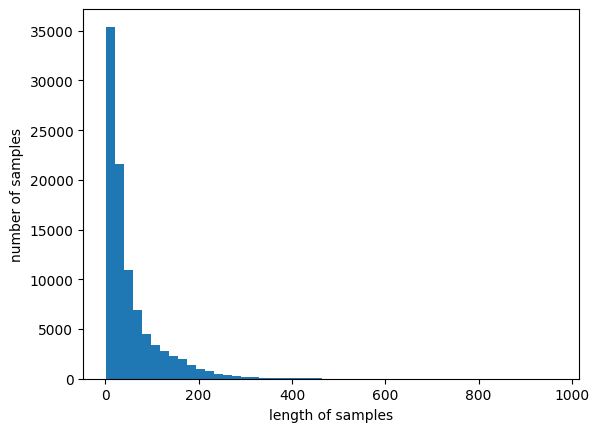

In [44]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### 샘플의 길이차이가 많으므로 샘플 길이를 150으로 맞춤 //임의
- 샘플길이가 일정 수 이하인 비율 계산하는 함수 작성 후 확인하고 진행

In [45]:
# 샘플길이가 파라미터 max_len 이하인 샘플 비율 확인 함수
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [46]:
max_len = 300
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 300 이하인 샘플의 비율: 99.22872676697433


In [47]:
# 전체 데이터의 길이는 130으로 맞춘다. 패딩 진행
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

### 학습 데이터 전처리 완성

## 2. 딥러닝 모델 학습, 예측

In [48]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D, Dropout, Bidirectional, SimpleRNN, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers

In [49]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
#mc = ModelCheckpoint('./model/best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [50]:
embedding_dim = 100 # 1개 단어에 대한 밀집벡터 사이즈
hidden_units = 100 # LSTM의 뉴런 수

In [51]:
partial_x_train, X_val, partial_y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## CNN

In [62]:
model_cnn = Sequential()
model_cnn.add(Embedding(vocab_size, 128))
model_cnn.add(Conv1D(128, 5, activation='relu'))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Conv1D(128, 7, activation='relu'))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(layers.Dense(128, activation='relu'))
model_cnn.add(layers.Dropout(0.5))
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.Dense(3, activation='softmax'))

In [63]:
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         3082240   
                                                                 
 conv1d (Conv1D)             (None, None, 128)         82048     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 128)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, None, 128)         114816    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 128)        0         
 1D)                                                             
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0

In [86]:
history_cnn = model_cnn.fit(partial_x_train, partial_y_train, epochs=40, batch_size=128, callbacks=[es], validation_data=(X_val, y_val)) # train에서 0.2정도 빼서 test로

Epoch 1/40
594/594 [==============================] - 16s 17ms/step - loss: 0.7758 - acc: 0.6467 - val_loss: 0.6929 - val_acc: 0.6919
Epoch 2/40
594/594 [==============================] - 9s 16ms/step - loss: 0.6115 - acc: 0.7389 - val_loss: 0.6840 - val_acc: 0.7043
Epoch 3/40
594/594 [==============================] - 10s 16ms/step - loss: 0.4770 - acc: 0.8045 - val_loss: 0.8148 - val_acc: 0.6852
Epoch 4/40
594/594 [==============================] - 10s 16ms/step - loss: 0.3206 - acc: 0.8775 - val_loss: 1.1372 - val_acc: 0.6738
Epoch 5/40
594/594 [==============================] - 10s 16ms/step - loss: 0.2075 - acc: 0.9242 - val_loss: 1.1870 - val_acc: 0.6751
Epoch 6/40
594/594 [==============================] - 9s 16ms/step - loss: 0.1359 - acc: 0.9518 - val_loss: 1.2941 - val_acc: 0.6710
Epoch 6: early stopping


In [87]:
print("\n 테스트 정확도: %.4f" % (model_cnn.evaluate(X_test, y_test)[1]))

809/809 [==============================] - 2s 3ms/step - loss: 1.0891 - acc: 0.7231

 테스트 정확도: 0.7231


In [143]:
history_cnn = model_cnn.fit(partial_x_train, partial_y_train, epochs=40, batch_size=128, callbacks=[es], validation_data=(X_val, y_val)) # train에서 0.2정도 빼서 test로

Epoch 1/40
594/594 [==============================] - 10s 16ms/step - loss: 0.7796 - acc: 0.6433 - val_loss: 0.6981 - val_acc: 0.6869
Epoch 2/40
594/594 [==============================] - 9s 16ms/step - loss: 0.6176 - acc: 0.7364 - val_loss: 0.7220 - val_acc: 0.6927
Epoch 3/40
594/594 [==============================] - 9s 16ms/step - loss: 0.4819 - acc: 0.8025 - val_loss: 0.7845 - val_acc: 0.6895
Epoch 4/40
594/594 [==============================] - 10s 16ms/step - loss: 0.3292 - acc: 0.8736 - val_loss: 0.9786 - val_acc: 0.6654
Epoch 5/40
594/594 [==============================] - 10s 16ms/step - loss: 0.2152 - acc: 0.9203 - val_loss: 1.1793 - val_acc: 0.6703
Epoch 5: early stopping


In [144]:
print("\n 테스트 정확도: %.4f" % (model_cnn.evaluate(X_test, y_test)[1]))

809/809 [==============================] - 2s 3ms/step - loss: 0.9851 - acc: 0.7184

 테스트 정확도: 0.7184


In [64]:
history_cnn = model_cnn.fit(partial_x_train, partial_y_train, epochs=40, batch_size=128, validation_data=(X_val, y_val)) # train에서 0.2정도 빼서 test로

Epoch 1/40
594/594 [==============================] - 16s 16ms/step - loss: 0.7868 - acc: 0.6378 - val_loss: 0.6925 - val_acc: 0.6918
Epoch 2/40
594/594 [==============================] - 9s 15ms/step - loss: 0.6297 - acc: 0.7283 - val_loss: 0.6972 - val_acc: 0.6890
Epoch 3/40
594/594 [==============================] - 9s 15ms/step - loss: 0.4901 - acc: 0.7983 - val_loss: 0.7786 - val_acc: 0.6726
Epoch 4/40
594/594 [==============================] - 9s 16ms/step - loss: 0.3370 - acc: 0.8677 - val_loss: 1.0306 - val_acc: 0.6591
Epoch 5/40
594/594 [==============================] - 9s 16ms/step - loss: 0.2200 - acc: 0.9191 - val_loss: 1.1503 - val_acc: 0.6388
Epoch 6/40
594/594 [==============================] - 10s 16ms/step - loss: 0.1447 - acc: 0.9481 - val_loss: 1.3819 - val_acc: 0.6583
Epoch 7/40
594/594 [==============================] - 9s 16ms/step - loss: 0.1145 - acc: 0.9588 - val_loss: 1.5502 - val_acc: 0.6549
Epoch 8/40
594/594 [==============================] - 9s 16ms/step 

In [65]:
print("\n 테스트 정확도: %.4f" % (model_cnn.evaluate(X_test, y_test)[1]))

809/809 [==============================] - 2s 3ms/step - loss: 2.5700 - acc: 0.7098

 테스트 정확도: 0.7098


## LSTM

In [66]:
model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, 128))
model_lstm.add(LSTM(128))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(3, activation='softmax'))

In [67]:
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         3082240   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 3,214,211
Trainable params: 3,214,211
Non-trainable params: 0
_________________________________________________________________


In [90]:
history_lstm = model_lstm.fit(partial_x_train, partial_y_train, epochs=40, batch_size=128, callbacks=[es], validation_data=(X_val, y_val)) # train에서 0.2정도 빼서 test로

Epoch 1/40
594/594 [==============================] - 20s 30ms/step - loss: 0.7424 - acc: 0.6657 - val_loss: 0.6870 - val_acc: 0.6973
Epoch 2/40
594/594 [==============================] - 19s 31ms/step - loss: 0.6280 - acc: 0.7310 - val_loss: 0.6958 - val_acc: 0.6924
Epoch 3/40
594/594 [==============================] - 19s 31ms/step - loss: 0.5689 - acc: 0.7609 - val_loss: 0.7273 - val_acc: 0.6948
Epoch 4/40
594/594 [==============================] - 19s 32ms/step - loss: 0.5015 - acc: 0.7954 - val_loss: 0.7481 - val_acc: 0.6891
Epoch 5/40
594/594 [==============================] - 20s 33ms/step - loss: 0.4346 - acc: 0.8263 - val_loss: 0.8097 - val_acc: 0.6735
Epoch 5: early stopping


In [91]:
print("\n 테스트 정확도: %.4f" % (model_lstm.evaluate(X_test, y_test)[1]))

809/809 [==============================] - 6s 7ms/step - loss: 0.7218 - acc: 0.7110

 테스트 정확도: 0.7110


In [147]:
history_lstm = model_lstm.fit(partial_x_train, partial_y_train, epochs=40, batch_size=128, callbacks=[es], validation_data=(X_val, y_val)) # train에서 0.2정도 빼서 test로

Epoch 1/40
594/594 [==============================] - 19s 31ms/step - loss: 0.7468 - acc: 0.6632 - val_loss: 0.6854 - val_acc: 0.6978
Epoch 2/40
594/594 [==============================] - 19s 32ms/step - loss: 0.6341 - acc: 0.7265 - val_loss: 0.6936 - val_acc: 0.6985
Epoch 3/40
594/594 [==============================] - 20s 33ms/step - loss: 0.5723 - acc: 0.7618 - val_loss: 0.7234 - val_acc: 0.6906
Epoch 4/40
594/594 [==============================] - 20s 33ms/step - loss: 0.5153 - acc: 0.7898 - val_loss: 0.7442 - val_acc: 0.6781
Epoch 5/40
594/594 [==============================] - 19s 33ms/step - loss: 0.4543 - acc: 0.8181 - val_loss: 0.8063 - val_acc: 0.6661
Epoch 5: early stopping


In [148]:
print("\n 테스트 정확도: %.4f" % (model_lstm.evaluate(X_test, y_test)[1]))

809/809 [==============================] - 6s 7ms/step - loss: 0.7290 - acc: 0.7000

 테스트 정확도: 0.7000


In [68]:
history_lstm = model_lstm.fit(partial_x_train, partial_y_train, epochs=40, batch_size=128, validation_data=(X_val, y_val)) # train에서 0.2정도 빼서 test로

Epoch 1/40
594/594 [==============================] - 19s 28ms/step - loss: 0.7485 - acc: 0.6639 - val_loss: 0.6932 - val_acc: 0.6921
Epoch 2/40
594/594 [==============================] - 18s 30ms/step - loss: 0.6381 - acc: 0.7277 - val_loss: 0.7019 - val_acc: 0.6805
Epoch 3/40
594/594 [==============================] - 18s 31ms/step - loss: 0.5746 - acc: 0.7594 - val_loss: 0.7551 - val_acc: 0.6602
Epoch 4/40
594/594 [==============================] - 18s 31ms/step - loss: 0.5162 - acc: 0.7896 - val_loss: 0.7775 - val_acc: 0.6726
Epoch 5/40
594/594 [==============================] - 18s 31ms/step - loss: 0.4526 - acc: 0.8186 - val_loss: 0.8575 - val_acc: 0.6629
Epoch 6/40
594/594 [==============================] - 18s 31ms/step - loss: 0.3954 - acc: 0.8450 - val_loss: 0.9408 - val_acc: 0.6667
Epoch 7/40
594/594 [==============================] - 19s 32ms/step - loss: 0.3480 - acc: 0.8651 - val_loss: 1.0503 - val_acc: 0.6588
Epoch 8/40
594/594 [==============================] - 19s 32ms

In [69]:
print("\n 테스트 정확도: %.4f" % (model_lstm.evaluate(X_test, y_test)[1]))

809/809 [==============================] - 6s 8ms/step - loss: 2.7135 - acc: 0.6863

 테스트 정확도: 0.6863


## RNN

In [53]:
model_rnn = Sequential()
model_rnn.add(Embedding(vocab_size, 128))
model_rnn.add(SimpleRNN(32, activation='relu'))
model_rnn.add(Dense(8, activation='relu'))
model_rnn.add(Dense(3, activation='softmax'))

In [54]:
model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         3082240   
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                5152      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 3,087,683
Trainable params: 3,087,683
Non-trainable params: 0
_________________________________________________________________


In [94]:
history_rnn = model_rnn.fit(partial_x_train, partial_y_train, epochs=40, batch_size=128, callbacks=[es], validation_data=(X_val, y_val)) 
# train에서 0.2정도 빼서 test로

Epoch 1/40
594/594 [==============================] - 195s 327ms/step - loss: 0.7885 - acc: 0.6338 - val_loss: 0.7428 - val_acc: 0.6697
Epoch 2/40
594/594 [==============================] - 203s 342ms/step - loss: 0.6297 - acc: 0.7263 - val_loss: 0.7841 - val_acc: 0.6714
Epoch 3/40
594/594 [==============================] - 204s 343ms/step - loss: 0.5365 - acc: 0.7769 - val_loss: 0.7572 - val_acc: 0.6746
Epoch 4/40
594/594 [==============================] - 197s 332ms/step - loss: 0.4649 - acc: 0.8132 - val_loss: 0.8257 - val_acc: 0.6602
Epoch 5/40
594/594 [==============================] - 187s 314ms/step - loss: 0.3927 - acc: 0.8444 - val_loss: 0.9307 - val_acc: 0.6556
Epoch 5: early stopping


In [95]:
print("\n 테스트 정확도: %.4f" % (model_rnn.evaluate(X_test, y_test)[1]))

809/809 [==============================] - 38s 47ms/step - loss: 0.8166 - acc: 0.6946

 테스트 정확도: 0.6946


In [151]:
history_rnn = model_rnn.fit(partial_x_train, partial_y_train, epochs=40, batch_size=128, callbacks=[es], validation_data=(X_val, y_val)) # train에서 0.2정도 빼서 test로

Epoch 1/40
594/594 [==============================] - 216s 362ms/step - loss: 0.7805 - acc: 0.6352 - val_loss: 0.6989 - val_acc: 0.6892
Epoch 2/40
594/594 [==============================] - 227s 383ms/step - loss: 0.6356 - acc: 0.7236 - val_loss: 0.7270 - val_acc: 0.6873
Epoch 3/40
594/594 [==============================] - 226s 381ms/step - loss: 0.5545 - acc: 0.7667 - val_loss: 0.7779 - val_acc: 0.6791
Epoch 4/40
594/594 [==============================] - 221s 371ms/step - loss: 0.4749 - acc: 0.8089 - val_loss: 0.8437 - val_acc: 0.6736
Epoch 5/40
594/594 [==============================] - 220s 371ms/step - loss: 0.4096 - acc: 0.8396 - val_loss: 0.8654 - val_acc: 0.6543
Epoch 5: early stopping


In [153]:
print("\n 테스트 정확도: %.4f" % (model_rnn.evaluate(X_test, y_test)[1]))

809/809 [==============================] - 41s 51ms/step - loss: 0.7816 - acc: 0.6884

 테스트 정확도: 0.6884


In [55]:
history_rnn = model_rnn.fit(partial_x_train, partial_y_train, epochs=40, batch_size=128, validation_data=(X_val, y_val)) # train에서 0.2정도 빼서 test로

Epoch 1/40
594/594 [==============================] - 287s 479ms/step - loss: 0.7870 - acc: 0.6361 - val_loss: 0.7265 - val_acc: 0.6821
Epoch 2/40
594/594 [==============================] - 283s 477ms/step - loss: 0.6433 - acc: 0.7185 - val_loss: 0.7177 - val_acc: 0.6799
Epoch 3/40
594/594 [==============================] - 293s 494ms/step - loss: 0.5624 - acc: 0.7610 - val_loss: 0.7600 - val_acc: 0.6752
Epoch 4/40
594/594 [==============================] - 302s 509ms/step - loss: 0.4726 - acc: 0.8063 - val_loss: 0.8287 - val_acc: 0.6591
Epoch 5/40
594/594 [==============================] - 277s 467ms/step - loss: 0.4194 - acc: 0.8344 - val_loss: 0.8921 - val_acc: 0.6561
Epoch 6/40
594/594 [==============================] - 271s 456ms/step - loss: 0.3613 - acc: 0.8577 - val_loss: 1.0255 - val_acc: 0.6438
Epoch 7/40
594/594 [==============================] - 292s 492ms/step - loss: 0.2843 - acc: 0.8929 - val_loss: 1.1277 - val_acc: 0.6354
Epoch 8/40
594/594 [============================

In [56]:
print("\n 테스트 정확도: %.4f" % (model_rnn.evaluate(X_test, y_test)[1]))

809/809 [==============================] - 49s 60ms/step - loss: 1.8915 - acc: 0.6692

 테스트 정확도: 0.6692


## Bi-LSTM

In [70]:
model_bi_lstm = Sequential()
model_bi_lstm.add(Embedding(vocab_size, 128))
model_bi_lstm.add(Bidirectional(LSTM(128)))
model_bi_lstm.add(Dropout(0.5))
model_bi_lstm.add(Dense(3, activation='softmax'))
model_bi_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [71]:
model_bi_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model_bi_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         3082240   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 3,346,179
Trainable params: 3,346,179
Non-trainable params: 0
_________________________________________________________________


In [72]:
print(len(y_val[y_val == 0]))
print(len(y_val[y_val == 1]))
print(len(y_val[y_val == 2]))

6338
5948
6696


In [73]:
print(len(partial_y_train[partial_y_train == 0]))
print(len(partial_y_train[partial_y_train == 1]))
print(len(partial_y_train[partial_y_train == 2]))

25192
24140
26594


In [100]:
history_bi_lstm = model_bi_lstm.fit(partial_x_train, partial_y_train, epochs=40, batch_size=128, callbacks=[es], validation_data=(X_val, y_val)) 
# train에서 0.2정도 빼서 test로

Epoch 1/40
594/594 [==============================] - 31s 49ms/step - loss: 0.7469 - acc: 0.6617 - val_loss: 0.6925 - val_acc: 0.6959
Epoch 2/40
594/594 [==============================] - 29s 49ms/step - loss: 0.6322 - acc: 0.7277 - val_loss: 0.6839 - val_acc: 0.6957
Epoch 3/40
594/594 [==============================] - 30s 50ms/step - loss: 0.5792 - acc: 0.7562 - val_loss: 0.7178 - val_acc: 0.6875
Epoch 4/40
594/594 [==============================] - 30s 51ms/step - loss: 0.5195 - acc: 0.7882 - val_loss: 0.7603 - val_acc: 0.6696
Epoch 5/40
594/594 [==============================] - 31s 52ms/step - loss: 0.4621 - acc: 0.8156 - val_loss: 0.7916 - val_acc: 0.6844
Epoch 6/40
594/594 [==============================] - 31s 52ms/step - loss: 0.4085 - acc: 0.8405 - val_loss: 0.9038 - val_acc: 0.6725
Epoch 6: early stopping


In [102]:
print("\n 테스트 정확도: %.4f" % (model_bi_lstm.evaluate(X_test, y_test)[1]))

809/809 [==============================] - 9s 11ms/step - loss: 0.7966 - acc: 0.7080

 테스트 정확도: 0.7080


In [156]:
history_bi_lstm = model_bi_lstm.fit(partial_x_train, partial_y_train, epochs=40, batch_size=128, callbacks=[es], validation_data=(X_val, y_val)) # train에서 0.2정도 빼서 test로

Epoch 1/40
594/594 [==============================] - 33s 53ms/step - loss: 0.7478 - acc: 0.6597 - val_loss: 0.6959 - val_acc: 0.6934
Epoch 2/40
594/594 [==============================] - 33s 55ms/step - loss: 0.6341 - acc: 0.7299 - val_loss: 0.6909 - val_acc: 0.6990
Epoch 3/40
594/594 [==============================] - 33s 56ms/step - loss: 0.5728 - acc: 0.7610 - val_loss: 0.6994 - val_acc: 0.6907
Epoch 4/40
594/594 [==============================] - 33s 56ms/step - loss: 0.5151 - acc: 0.7901 - val_loss: 0.7470 - val_acc: 0.6866
Epoch 5/40
594/594 [==============================] - 33s 56ms/step - loss: 0.4597 - acc: 0.8158 - val_loss: 0.8399 - val_acc: 0.6525
Epoch 6/40
594/594 [==============================] - 33s 55ms/step - loss: 0.4017 - acc: 0.8425 - val_loss: 0.9333 - val_acc: 0.6749
Epoch 6: early stopping


In [157]:
print("\n 테스트 정확도: %.4f" % (model_bi_lstm.evaluate(X_test, y_test)[1]))

809/809 [==============================] - 11s 13ms/step - loss: 0.8215 - acc: 0.7081

 테스트 정확도: 0.7081


In [74]:
history_bi_lstm = model_bi_lstm.fit(partial_x_train, partial_y_train, epochs=40, batch_size=128, validation_data=(X_val, y_val)) # train에서 0.2정도 빼서 test로

Epoch 1/40
594/594 [==============================] - 33s 52ms/step - loss: 0.7481 - acc: 0.6595 - val_loss: 0.7092 - val_acc: 0.6928
Epoch 2/40
594/594 [==============================] - 31s 52ms/step - loss: 0.6399 - acc: 0.7260 - val_loss: 0.7091 - val_acc: 0.6947
Epoch 3/40
594/594 [==============================] - 31s 52ms/step - loss: 0.5751 - acc: 0.7577 - val_loss: 0.7182 - val_acc: 0.6796
Epoch 4/40
594/594 [==============================] - 31s 53ms/step - loss: 0.5149 - acc: 0.7884 - val_loss: 0.7931 - val_acc: 0.6744
Epoch 5/40
594/594 [==============================] - 31s 53ms/step - loss: 0.4520 - acc: 0.8189 - val_loss: 0.8388 - val_acc: 0.6662
Epoch 6/40
594/594 [==============================] - 31s 53ms/step - loss: 0.4016 - acc: 0.8412 - val_loss: 0.9068 - val_acc: 0.6608
Epoch 7/40
594/594 [==============================] - 31s 53ms/step - loss: 0.3479 - acc: 0.8635 - val_loss: 1.0143 - val_acc: 0.6506
Epoch 8/40
594/594 [==============================] - 31s 53ms

In [75]:
print("\n 테스트 정확도: %.4f" % (model_bi_lstm.evaluate(X_test, y_test)[1]))

809/809 [==============================] - 11s 13ms/step - loss: 2.5851 - acc: 0.6805

 테스트 정확도: 0.6805


In [241]:
# # word_index 대신 tokenizer 객체 저장
# with open('tokenizer.pickle', 'wb') as handle :
#     pickle.dump(tokenizer, handle)

# with open('tokenizer.pickle', 'rb') as handle :
#     tokenizer = pickle.load(handle)

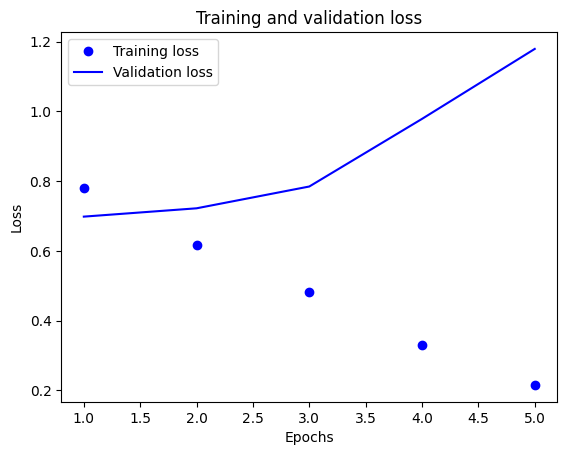

In [158]:
# 손실도 곡선 CNN
import matplotlib.pyplot as plt

loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

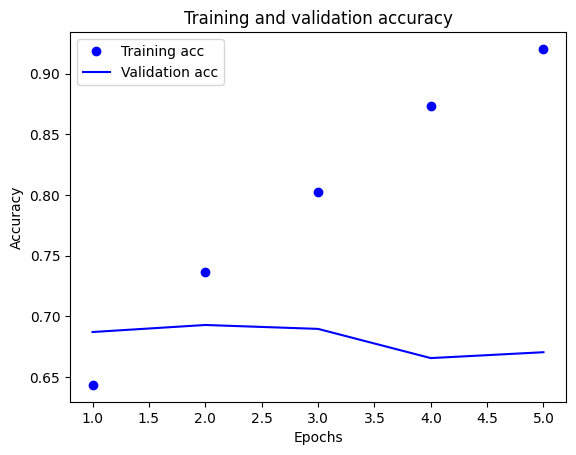

In [159]:
# 정확도 곡선 CNN
plt.clf()

acc = history_cnn.history['acc']
val_acc = history_cnn.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

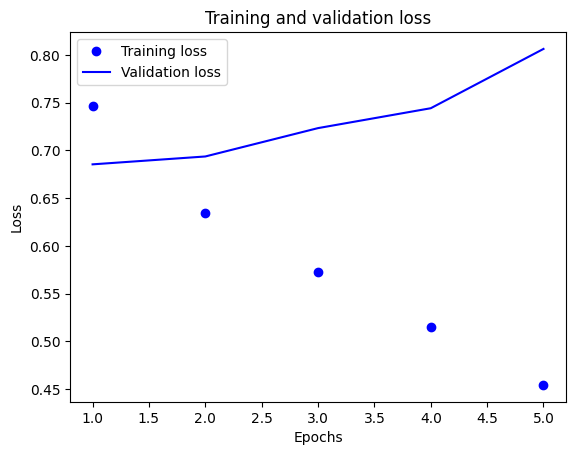

In [160]:
# 손실도 곡선 LSTM
import matplotlib.pyplot as plt

loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

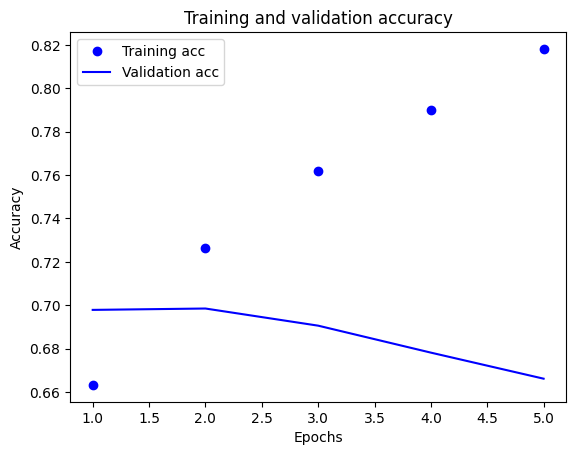

In [161]:
# 정확도 곡선 LSTM
plt.clf()

acc = history_lstm.history['acc']
val_acc = history_lstm.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

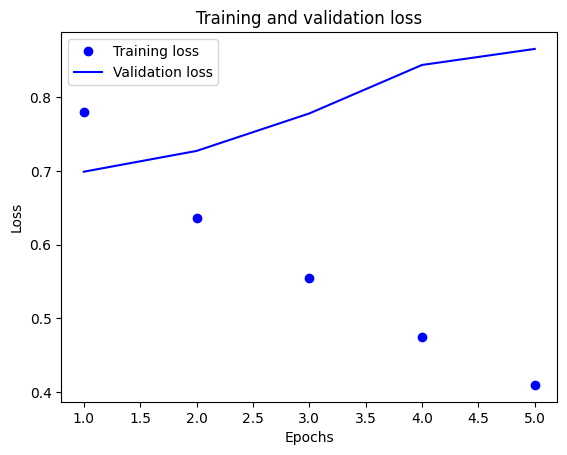

In [162]:
# 손실도 곡선 RNN
import matplotlib.pyplot as plt

loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

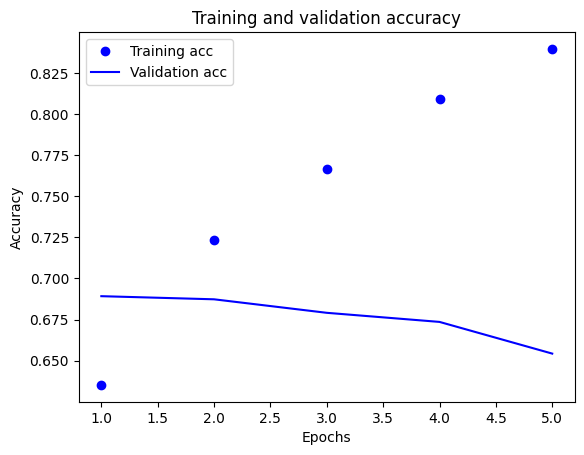

In [163]:
# 정확도 곡선 RNN
plt.clf()

acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

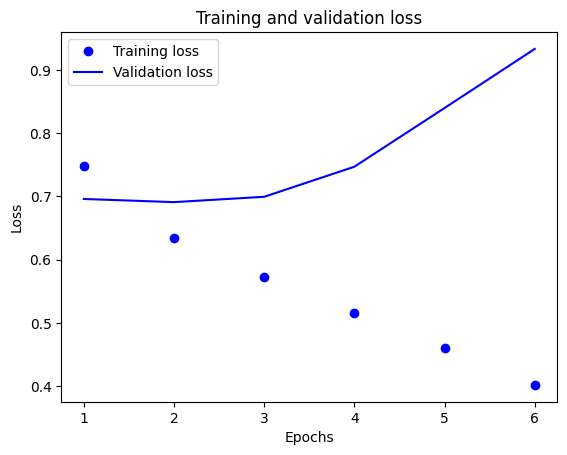

In [164]:
# 손실도 곡선 bi-LSTM
import matplotlib.pyplot as plt

loss = history_bi_lstm.history['loss']
val_loss = history_bi_lstm.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

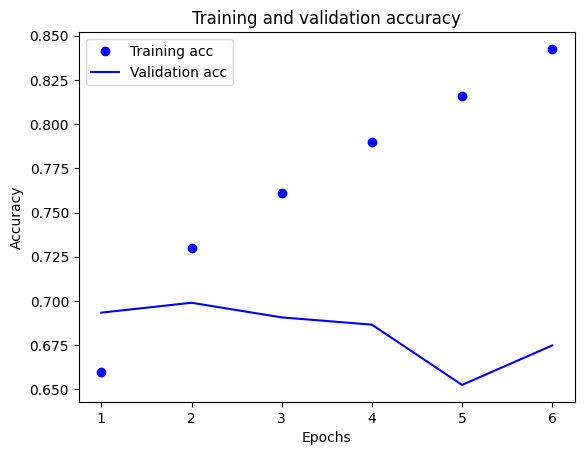

In [165]:
# 정확도 곡선 bi-LSTM
plt.clf()

acc = history_bi_lstm.history['acc']
val_acc = history_bi_lstm.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Epochs 40번 돌린 후 그래프

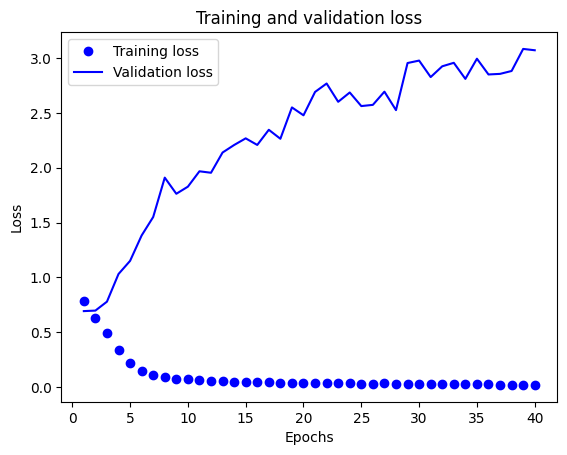

In [76]:
# 손실도 곡선 CNN
import matplotlib.pyplot as plt

loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

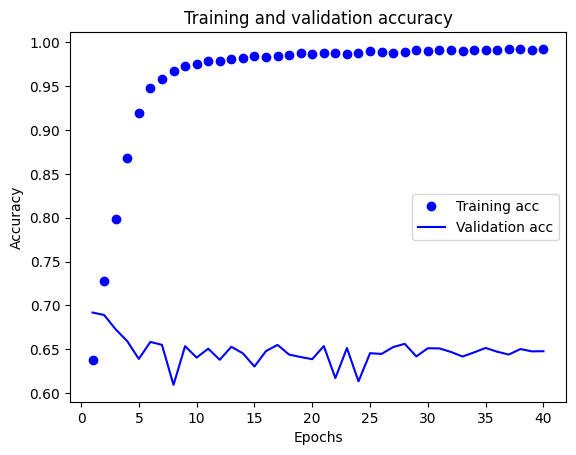

In [77]:
# 정확도 곡선 CNN
plt.clf()

acc = history_cnn.history['acc']
val_acc = history_cnn.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

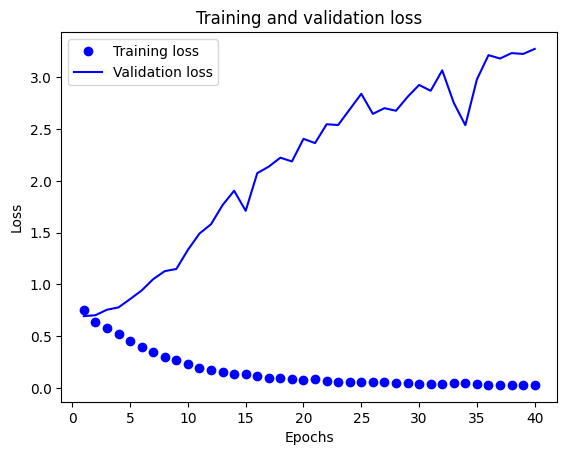

In [78]:
# 손실도 곡선 LSTM
import matplotlib.pyplot as plt

loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

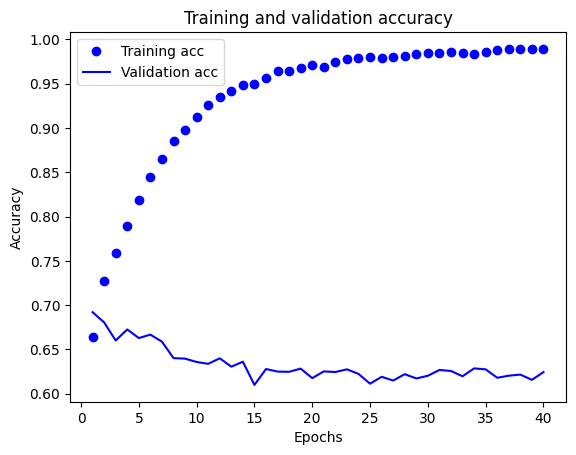

In [79]:
# 정확도 곡선 LSTM
plt.clf()

acc = history_lstm.history['acc']
val_acc = history_lstm.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

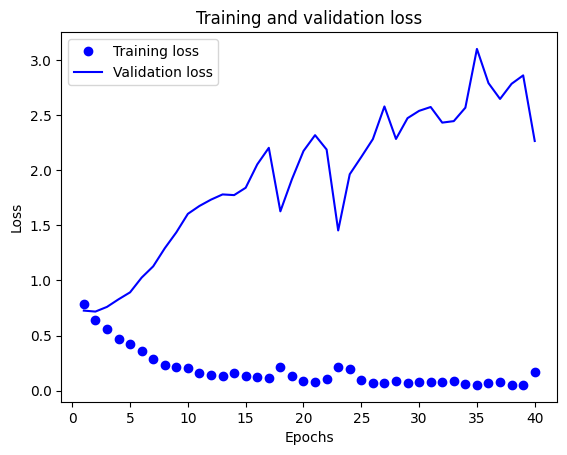

In [57]:
# 손실도 곡선 RNN
import matplotlib.pyplot as plt

loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 

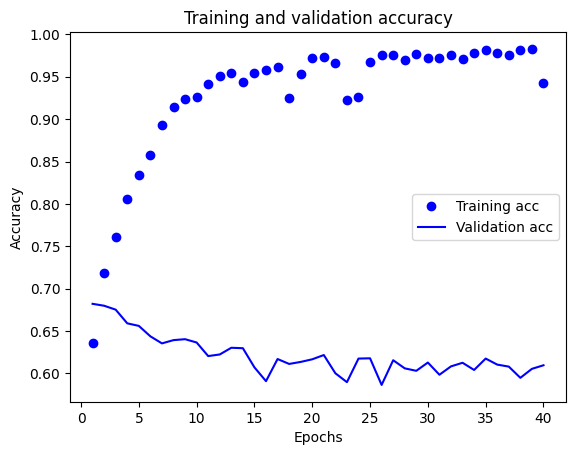

In [58]:
# 정확도 곡선 RNN
plt.clf()

acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

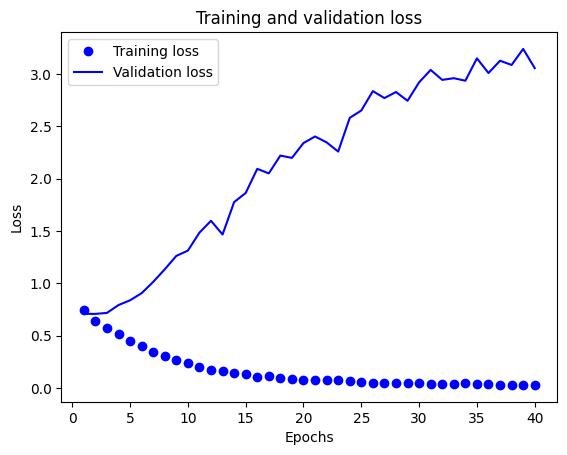

In [80]:
# 손실도 곡선 bi-LSTM
import matplotlib.pyplot as plt

loss = history_bi_lstm.history['loss']
val_loss = history_bi_lstm.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

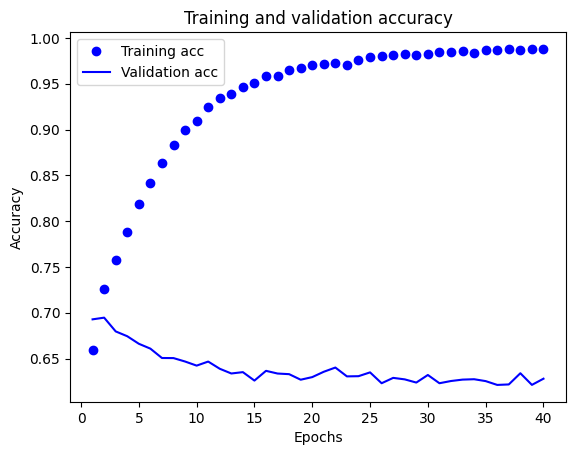

In [81]:
# 정확도 곡선 bi-LSTM
plt.clf()

acc = history_bi_lstm.history['acc']
val_acc = history_bi_lstm.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [167]:
MAX_LENGTH = 150 #문장최대길이

sentence = input('감성분석할 문장을 입력해 주세요.: ')

# 새로 입력된 문장을 전처리
sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\\s ]','', sentence)
stopwords = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한'] # 불용어 추가할 것이 있으면 이곳에 추가
sentence = okt.morphs(sentence, stem=True) # 토큰화
sentence = [word for word in sentence if not word in stopwords] # 불용어 제거
print(sentence)

vector  = tokenizer.texts_to_sequences(sentence)
# vector = np.reshape(vector,(1,-1))
pad_new = pad_sequences([vector], maxlen = MAX_LENGTH, padding='post') # 패딩
# model = tf.keras.models.load_model('./model/review.h5')
# print(pad_new)
predictions = model_cnn.predict(pad_new)
print(predictions)

if np.argmax(predictions) == 2:
    print('좋음')
    print(predictions)
elif np.argmax(predictions) == 1:
    print('보통')
    print(predictions)
elif np.argmax(predictions) == 0:
    print('별로')
    print(predictions)

감성분석할 문장을 입력해 주세요.:  완전 실망이에요


['완전', '실망', '이에요']
1/1 [==============================] - 0s 18ms/step
[[9.8016465e-01 1.9386487e-02 4.4880234e-04]]
별로
[[9.8016465e-01 1.9386487e-02 4.4880234e-04]]
